# 初学者的TensorFlow教程

In [23]:
from __future__ import absolute_import, division, print_function, unicode_literals

#载入Tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt

载入准备好的MNIST数据集。将样本从整数转换为浮点数:

1
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 145 255 211  31   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  32 237 253 252  71   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 175 253 252  71   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 144 253 252  71   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  16 191 253 252 

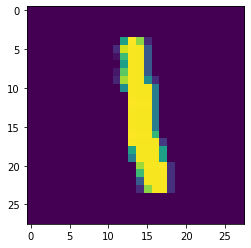

In [38]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[6])
print(y_train[6])
print(x_train[6])

In [39]:
x_train, x_test = x_train / 255.0, x_test / 255.0 # map each number between 0 and 1

将模型的各层堆叠起来，以搭建tf.keras.Sequential模型。为训练选择优化器和损失函数：

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # The image is 28x28 输入层
    tf.keras.layers.Dense(128, activation = 'relu'), # 128 neurons 隐藏层
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax') # Last layers have ten neurons, because there are ten kinds of clothes. 输出层
])

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

训练并验证模型：

In [44]:
model.fit(x_train, y_train, epochs = 10)
model.evaluate(x_test, y_test, verbose = 2)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0646 - accuracy: 0.9792
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0602 - accuracy: 0.9804
Epoch 3/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0531 - accuracy: 0.9822
Epoch 4/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0503 - accuracy: 0.9841
Epoch 5/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0440 - accuracy: 0.9859
Epoch 6/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0422 - accuracy: 0.9862s - l
Epoch 7/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0396 - accuracy: 0.9866
Epoch 8/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0366 - accuracy: 0.9880
Epoch 9/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0341 - accuracy: 0.9886
Epoch 10/

[0.06957913205295918, 0.9823]

现在这个照片分类器的准确度已经达到98%。

In [52]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.02):
            print("\nLoss is low so cancelling training!")
            self.model.stop_training = True

In [53]:
callbacks = myCallback()
model.fit(x_train, y_train, epochs=5, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0269 - accuracy: 0.9905
Epoch 2/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0255 - accuracy: 0.9913s
Epoch 3/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0258 - accuracy: 0.9910
Epoch 4/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0241 - accuracy: 0.9917
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0240 - accuracy: 0.9920


-------
# 网络层

### 关于Keras层
- 所有层对象都有
   - layer.get_weights(): 返回层的权重
   - layer.set_weights(weights): 从numpy array中将权重加载到该层中
   - layer.get_config(): 返回当前层配置信息的字典，层也可以借由配置信息重构
- layer = Dense(32)



后面待补充

---------
# TensorFlow 2.0实践系列课程

In [16]:
from __future__ import absolute_import, division, print_function, unicode_literals

#载入Tensorflow
import tensorflow as tf
import numpy as np

### A primer in machine learning
- 深度学习是机器学习的进一步发展
- 深度学习主要是依靠神经网络
- TensorFlow中的一个API是Keras
- keras使得定义神经网络变得容易
- a neural network is basically a set of function which can learn patterns

In [17]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])]) 
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

- the simplest neural network with only one neural
- use **Dense** to define a layer of connected neurons
- **a single neuron**: only one dense here, so there's only one layer, one unit in it
- **sequence**: Successive layers are defined in sequence, hence the word Sequential

In [19]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype = float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype = float)

In [20]:
model.fit(xs, ys, epochs = 500)

Train on 6 samples
Epoch 1/500
6/6 [==============================] - 0s 43ms/sample - loss: 9.2506
Epoch 2/500
6/6 [==============================] - 0s 219us/sample - loss: 7.4839
Epoch 3/500
6/6 [==============================] - 0s 383us/sample - loss: 6.0896
Epoch 4/500
6/6 [==============================] - 0s 697us/sample - loss: 4.9886
Epoch 5/500
6/6 [==============================] - 0s 439us/sample - loss: 4.1183
Epoch 6/500
6/6 [==============================] - 0s 358us/sample - loss: 3.4296
Epoch 7/500
6/6 [==============================] - 0s 213us/sample - loss: 2.8839
Epoch 8/500
6/6 [==============================] - 0s 615us/sample - loss: 2.4507
Epoch 9/500
6/6 [==============================] - 0s 463us/sample - loss: 2.1062
Epoch 10/500
6/6 [==============================] - 0s 282us/sample - loss: 1.8315
Epoch 11/500
6/6 [==============================] - 0s 323us/sample - loss: 1.6118
Epoch 12/500
6/6 [==============================] - 0s 239us/sample - loss: 1.

Epoch 100/500
6/6 [==============================] - 0s 380us/sample - loss: 0.1369
Epoch 101/500
6/6 [==============================] - 0s 574us/sample - loss: 0.1341
Epoch 102/500
6/6 [==============================] - 0s 327us/sample - loss: 0.1314
Epoch 103/500
6/6 [==============================] - 0s 321us/sample - loss: 0.1287
Epoch 104/500
6/6 [==============================] - 0s 497us/sample - loss: 0.1260
Epoch 105/500
6/6 [==============================] - 0s 278us/sample - loss: 0.1234
Epoch 106/500
6/6 [==============================] - 0s 507us/sample - loss: 0.1209
Epoch 107/500
6/6 [==============================] - 0s 552us/sample - loss: 0.1184
Epoch 108/500
6/6 [==============================] - 0s 289us/sample - loss: 0.1160
Epoch 109/500
6/6 [==============================] - 0s 380us/sample - loss: 0.1136
Epoch 110/500
6/6 [==============================] - 0s 278us/sample - loss: 0.1113
Epoch 111/500
6/6 [==============================] - 0s 578us/sample - loss:

Epoch 198/500
6/6 [==============================] - 0s 378us/sample - loss: 0.0179
Epoch 199/500
6/6 [==============================] - 0s 301us/sample - loss: 0.0175
Epoch 200/500
6/6 [==============================] - 0s 273us/sample - loss: 0.0172
Epoch 201/500
6/6 [==============================] - 0s 319us/sample - loss: 0.0168
Epoch 202/500
6/6 [==============================] - 0s 530us/sample - loss: 0.0165
Epoch 203/500
6/6 [==============================] - 0s 366us/sample - loss: 0.0161
Epoch 204/500
6/6 [==============================] - 0s 311us/sample - loss: 0.0158
Epoch 205/500
6/6 [==============================] - 0s 309us/sample - loss: 0.0155
Epoch 206/500
6/6 [==============================] - 0s 426us/sample - loss: 0.0152
Epoch 207/500
6/6 [==============================] - 0s 300us/sample - loss: 0.0149
Epoch 208/500
6/6 [==============================] - 0s 323us/sample - loss: 0.0146
Epoch 209/500
6/6 [==============================] - 0s 300us/sample - loss:

Epoch 296/500
6/6 [==============================] - 0s 531us/sample - loss: 0.0023
Epoch 297/500
6/6 [==============================] - 0s 1ms/sample - loss: 0.0023
Epoch 298/500
6/6 [==============================] - 0s 1ms/sample - loss: 0.0022
Epoch 299/500
6/6 [==============================] - 0s 732us/sample - loss: 0.0022
Epoch 300/500
6/6 [==============================] - 0s 808us/sample - loss: 0.0022
Epoch 301/500
6/6 [==============================] - 0s 953us/sample - loss: 0.0021
Epoch 302/500
6/6 [==============================] - 0s 1ms/sample - loss: 0.0021
Epoch 303/500
6/6 [==============================] - 0s 498us/sample - loss: 0.0020
Epoch 304/500
6/6 [==============================] - 0s 748us/sample - loss: 0.0020
Epoch 305/500
6/6 [==============================] - 0s 986us/sample - loss: 0.0019
Epoch 306/500
6/6 [==============================] - 0s 236us/sample - loss: 0.0019
Epoch 307/500
6/6 [==============================] - 0s 1ms/sample - loss: 0.0019


6/6 [==============================] - 0s 347us/sample - loss: 3.2625e-04
Epoch 392/500
6/6 [==============================] - 0s 327us/sample - loss: 3.1955e-04
Epoch 393/500
6/6 [==============================] - 0s 288us/sample - loss: 3.1299e-04
Epoch 394/500
6/6 [==============================] - 0s 354us/sample - loss: 3.0656e-04
Epoch 395/500
6/6 [==============================] - 0s 301us/sample - loss: 3.0026e-04
Epoch 396/500
6/6 [==============================] - 0s 394us/sample - loss: 2.9409e-04
Epoch 397/500
6/6 [==============================] - 0s 386us/sample - loss: 2.8805e-04
Epoch 398/500
6/6 [==============================] - 0s 287us/sample - loss: 2.8214e-04
Epoch 399/500
6/6 [==============================] - 0s 739us/sample - loss: 2.7634e-04
Epoch 400/500
6/6 [==============================] - 0s 472us/sample - loss: 2.7066e-04
Epoch 401/500
6/6 [==============================] - 0s 290us/sample - loss: 2.6510e-04
Epoch 402/500
6/6 [===========================

Epoch 485/500
6/6 [==============================] - 0s 341us/sample - loss: 4.6374e-05
Epoch 486/500
6/6 [==============================] - 0s 272us/sample - loss: 4.5421e-05
Epoch 487/500
6/6 [==============================] - 0s 318us/sample - loss: 4.4488e-05
Epoch 488/500
6/6 [==============================] - 0s 311us/sample - loss: 4.3574e-05
Epoch 489/500
6/6 [==============================] - 0s 316us/sample - loss: 4.2681e-05
Epoch 490/500
6/6 [==============================] - 0s 285us/sample - loss: 4.1803e-05
Epoch 491/500
6/6 [==============================] - 0s 327us/sample - loss: 4.0945e-05
Epoch 492/500
6/6 [==============================] - 0s 275us/sample - loss: 4.0103e-05
Epoch 493/500
6/6 [==============================] - 0s 372us/sample - loss: 3.9280e-05
Epoch 494/500
6/6 [==============================] - 0s 316us/sample - loss: 3.8473e-05
Epoch 495/500
6/6 [==============================] - 0s 316us/sample - loss: 3.7683e-05
Epoch 496/500
6/6 [=============

In [21]:
print(model.predict([10.0]))

[[18.982996]]


**two main reasons:**
- very little data. There is very high probability that Y=19
- neural network try to figure out the answers for everything, they deal in probability

**Fashion MNIST dataset**
- 70k Images
- 10 Categories
- Images are 28x28
- Can train a neural net!